# Import Dependencies

In [8]:
# audio libraries
import librosa
import librosa.display as lplt
import IPython

# import matplotlib to be able to display graphs
import matplotlib.pyplot as plt

# transform .wav into .csv
import csv
import os
import numpy as np
import pandas as pd

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# model
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential


/home/camilla/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-11-27 19:15:24.887990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732731324.954158    4604 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732731324.972888    4604 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 19:15:25.125075: I tensorflow/core/platform/cpu_fe

# Check the Data

In [15]:
main_dir = "data/"

In [16]:
if os.path.exists(main_dir):
    # List all folders in the main directory
    all_folders = os.listdir(main_dir)
    
    # Initialize counters
    species_count = 0
    total_audio_files = 0
    folder_file_counts = {}  # Dictionary to store counts per folder
    
    print("All folders in the directory:")
    for folder in all_folders:
        folder_path = os.path.join(main_dir, folder)
        
        # Check if the path is a directory
        if not os.path.isdir(folder_path):
            print(f"Skipping '{folder}' as it is not a directory.")
            continue
        
        species_count += 1  # Increment species count
        
        # List all files in the current folder
        files = os.listdir(folder_path)
        
        # Count audio files with .wav or .mp3 extensions
        audio_count = sum(file.lower().endswith(('.wav', '.mp3')) for file in files)
        
        # Update counters
        folder_file_counts[folder] = audio_count
        total_audio_files += audio_count
        
        # Print count for the current folder
        print(f"- {folder}: {audio_count} audio file(s)")
    
    # Display summary
    print("\nSummary:")
    print(f"Total number of species (folders): {species_count}")
    print(f"Total number of audio files: {total_audio_files}")    
else:
    print("Directory does not exist.")


All folders in the directory:
- TucuxiDolphin: 12 audio file(s)
- NorthernRightWhale: 486 audio file(s)
- BowheadWhale: 407 audio file(s)
- Rough_ToothedDolphin: 98 audio file(s)
- PantropicalSpottedDolphin: 1034 audio file(s)
- SpermWhale: 1422 audio file(s)
- Beluga_WhiteWhale: 150 audio file(s)
- Dall'sPorpoise: 52 audio file(s)
- DuskyDolphin: 27 audio file(s)
- HarbourSeal: 1 audio file(s)
- BottlenoseDolphin: 189 audio file(s)
- Fraser'sDolphin: 199 audio file(s)
- FinlessPorpoise: 2 audio file(s)
- FalseKillerWhale: 508 audio file(s)
- SeaOtter: 2 audio file(s)
- StellerSeaLion: 6 audio file(s)
- SouthernRightWhale: 49 audio file(s)
- SpinnerDolphin: 524 audio file(s)
- WeddellSeal: 133 audio file(s)
- Fin_FinbackWhale: 583 audio file(s)
- GraySeal: 7 audio file(s)
- LongBeaked(Pacific)CommonDolphin: 69 audio file(s)
- Commerson'sDolphin: 1 audio file(s)
- Heaviside'sDolphin: 14 audio file(s)
- RibbonSeal: 45 audio file(s)
- ClymeneDolphin: 328 audio file(s)
- CommonDolphin: 884

# Testing an audio sound


In [11]:
test_sound = "data/AtlanticSpottedDolphin/6102500A.wav"

Load the sound with Librosa

In [13]:
data, sr = librosa.load(test_sound)
print(data, sr)
print(type(data), type(sr))

[ 0.01207208  0.02306455  0.02124204 ... -0.03007683 -0.03591386
  0.        ] 22050
<class 'numpy.ndarray'> <class 'int'>


In [14]:
librosa.load(test_sound ,sr = 22050)

(array([ 0.01207208,  0.02306455,  0.02124204, ..., -0.03007683,
        -0.03591386,  0.        ], dtype=float32),
 22050)

Play the sound

In [17]:
IPython.display.Audio(data, rate = sr)

# Visulizing the sound


### 1. Waveforms

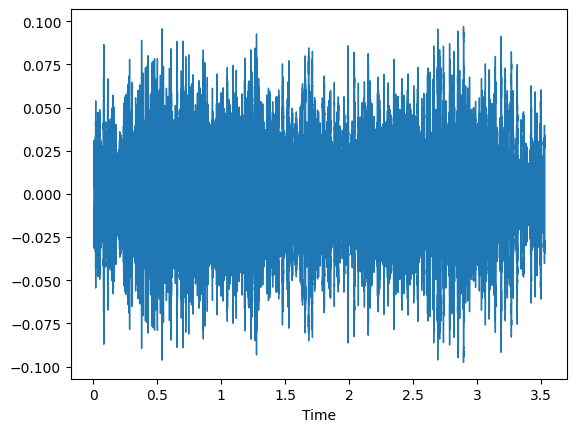

In [21]:
plt.show(librosa.display.waveshow(data))

### 2. Spectrograms

Short-time Fourier transform (STFT).

The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

/tmp/ipykernel_6511/4084433140.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  plt.colorbar(librosa.display.specshow(stft, sr = sr, x_axis = 'time', y_axis = 'hz'))


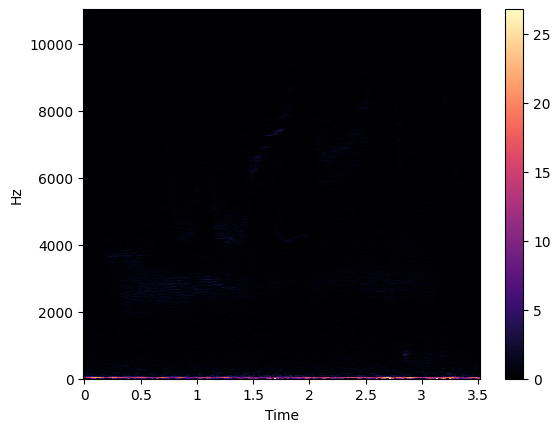

In [18]:
stft = librosa.stft(data)
plt.colorbar(librosa.display.specshow(stft, sr = sr, x_axis = 'time', y_axis = 'hz'))

This does not give us much because the frequency is very low. 
A sound spectrogram (or sonogram) is a visual representation of an acoustic signal. To oversimplify things a fair amount, a Fast Fourier transform is applied to an electronically recorded sound. This analysis essentially separates the frequencies and amplitudes of its component simplex waves. The result can then be displayed visually, with degrees of amplitude (represented light-to-dark, as in white=no energy, black=lots of energy), at various frequencies (usually on the vertical axis) by time (horizontal).

This displays the actual power spectrogram. 

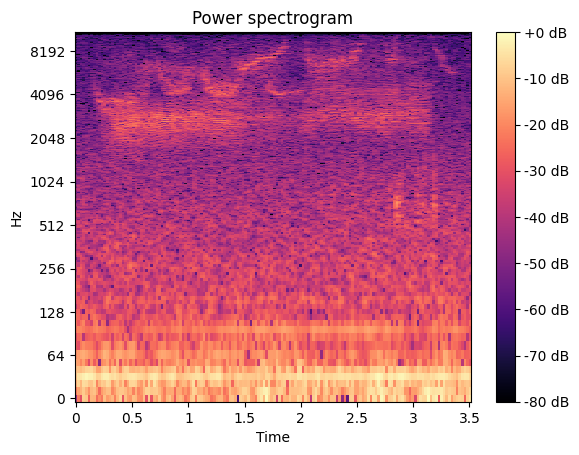

In [25]:
# stft_db = librosa.amplitude_to_db(abs(stft))
# plt.colorbar(librosa.display.specshow(stft_db, sr = sr, x_axis = 'time', y_axis = 'hz'))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft),
                                                       ref=np.max), sr = sr,
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

A long window resolves frequency at the expense of time — the result is a *narrow band spectrogram*, which reveals individual **harmonics** (component frequencies), but smears together adjacent 'moments'. If a short analysis window is used, adjacent harmonics are smeared together, but with better time resolution. The result is a *wide band spectrogram* in which individual pitch periods appear as vertical lines (or striations), with formant structure. The above is a narrow band spectrogram and gives us more info in the vocal tract. 

See more at https://home.cc.umanitoba.ca/~robh/howto.html. 

### 3. Spectral Roll-off

**Spectral Rolloff**: frequency below which a specified percentage of the total spectral energy.

**librosa.feature.spectral_rolloff** calculates the attenuation frequency for each frame of a signal.

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

/tmp/ipykernel_6511/422415253.py:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max),


[Text(0.5, 1.0, 'log Power spectrogram')]

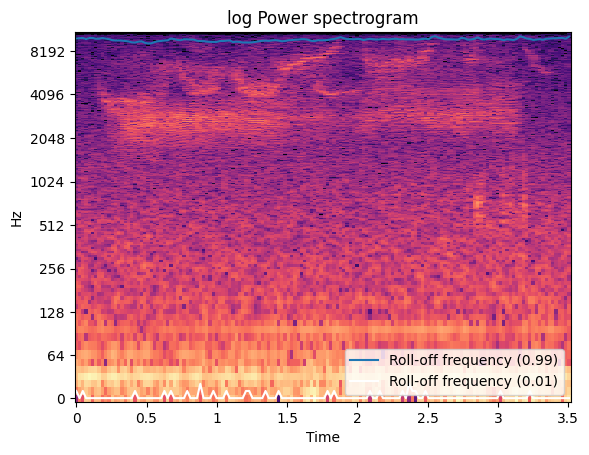

In [36]:
fig, ax = plt.subplots()
rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr, roll_percent=0.99)
rolloff_min = librosa.feature.spectral_rolloff(y=data, sr=sr, roll_percent=0.01)
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

### 4. Chroma Feature

Compute a chromagram from a waveform or power spectrogram.

Chroma-based features, which are also referred to as "pitch class profiles" (the set {C, C♯, D, D♯, E, F, F♯, G, G♯, A, A♯, B}), are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale.

Pitch can be separated into two components, which are referred to as tone height and chroma.  A pitch class is defined as the set of all pitches that share the same chroma. For example, using the scientific pitch notation, the pitch class corresponding to the chroma C is the set {..., C−2, C−1, C0, C1, C2, C3 ...}
consisting of all pitches separated by an integer number of octaves.

Identifying pitches that differ by an octave, chroma features show a high degree of robustness to variations in timbre and closely correlate to the musical aspect of harmony. This is the reason why chroma features are a well-established tool for processing and analyzing music data.For example, basically every chord recognition procedure relies on some kind of chroma representation. Also, chroma features have become the de facto standard for tasks such as music alignment and synchronization as well as audio structure analysis.Finally, chroma features have turned out to be a powerful mid-level feature representation in content-based audio retrieval such as cover song identification, audio matching or audio hashing.



/home/camilla/.local/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


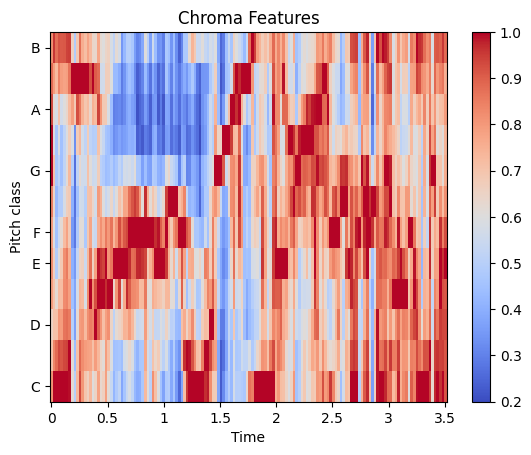

In [38]:
chroma = librosa.feature.chroma_stft(y=data, sr = sr)
lplt.specshow(chroma, sr = sr, x_axis = "time" ,y_axis = "chroma", cmap = "coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

### 5. Zero Crossing Rate

**Zero crossing**: occurs if successive samples have different algebraic signs.

- The rate at which zero crossings occur is a simple measure of the frequency content of a signal.
- The number of zero-crossings measures the number of times in a time interval that the amplitude of speech signals passes through a zero value.

In [47]:
librosa.feature.zero_crossing_rate(data)

array([[0.01123047, 0.01806641, 0.01953125, 0.01660156, 0.01855469,
        0.01464844, 0.02539062, 0.03808594, 0.05371094, 0.05712891,
        0.05371094, 0.04296875, 0.04980469, 0.0625    , 0.06152344,
        0.08984375, 0.07519531, 0.08154297, 0.09277344, 0.07958984,
        0.08007812, 0.06347656, 0.06933594, 0.07080078, 0.08398438,
        0.10888672, 0.12304688, 0.11328125, 0.1015625 , 0.07470703,
        0.0546875 , 0.08984375, 0.12304688, 0.14794922, 0.15332031,
        0.11914062, 0.09472656, 0.08935547, 0.1015625 , 0.12548828,
        0.12988281, 0.1328125 , 0.13671875, 0.12548828, 0.11181641,
        0.09912109, 0.08984375, 0.08691406, 0.1015625 , 0.11621094,
        0.125     , 0.13867188, 0.14794922, 0.13085938, 0.1328125 ,
        0.15136719, 0.16748047, 0.19042969, 0.19238281, 0.17773438,
        0.15673828, 0.16162109, 0.14111328, 0.17919922, 0.17138672,
        0.19433594, 0.22802734, 0.17431641, 0.17822266, 0.14892578,
        0.11425781, 0.10986328, 0.10205078, 0.12

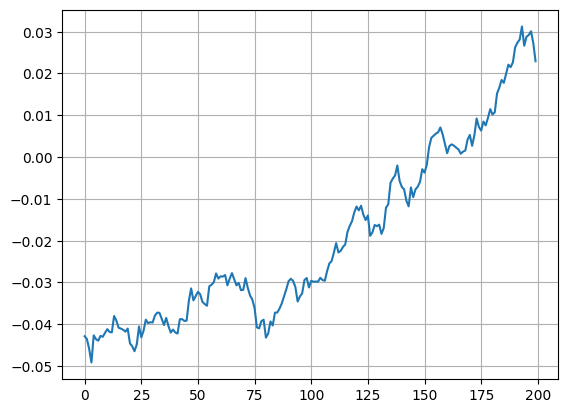

In [46]:
start = 1000
end = 1200
plt.plot(data[start:end])
plt.grid()

### All classes -- Spectrogram Samples

In [ ]:
import random

# Your main directory containing all species folders
main_dir = "data"

if os.path.exists(main_dir):
    # List all species (folders)
    all_folders = os.listdir(main_dir)
    
    # Filter only directories (species folders)
    species_folders = [folder for folder in all_folders if os.path.isdir(os.path.join(main_dir, folder))]
    
    # Create a figure with 28 rows and 2 columns (since we have 55 species)
    rows = (len(species_folders) + 1) // 2  # This gives us the correct number of rows
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 5))
    
    # Flatten axes array to make indexing easier
    axes = axes.flatten()
    
    for i, folder in enumerate(species_folders):  # Loop over all species
        if i >= len(axes):  # Stop if we have filled all subplots
            break
        
        folder_path = os.path.join(main_dir, folder)
        
        # List all audio files in the folder
        audio_files = [file for file in os.listdir(folder_path) if file.lower().endswith('.wav')]
        
        # Randomly select one audio file
        random_audio = random.choice(audio_files)
        audio_path = os.path.join(folder_path, random_audio)
        
        # Load the audio file
        data, sr = librosa.load(audio_path)
        
        # Compute the STFT (Short-Time Fourier Transform)
        stft = librosa.stft(data)
        
        # Display the spectrogram in dB
        ax = axes[i]
        img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft), ref=np.max),
                                       sr=sr, y_axis='log', x_axis='time', ax=ax)
        ax.set_title(f'Spectrogram - {folder}')
        fig.colorbar(img, ax=ax, format="%+2.0f dB")
    
    plt.tight_layout()


# Preprocessing the data

We need to convert the data into a csv to allow analysis and training of models. 

1. Define the columns names --> these will be various audio attributes. 

In [53]:
header = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean \
        perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var label".split()

2. Create the file.

In [56]:
file = open("data/all_csv/data.csv", "w", newline = "")
with file:
    writer = csv.writer(file)
    writer.writerow(header)

3. Specify the marine mammal classes

In [57]:
species_names = []  # List to hold species names

if os.path.exists(main_dir):
    # List all species (folders)
    all_folders = os.listdir(main_dir)
    
    # Filter only directories (species folders)
    species_folders = [folder for folder in all_folders if os.path.isdir(os.path.join(main_dir, folder))]
    
    # Append each species folder name to the species_names list
    species_names = [folder for folder in species_folders]

    # Create a string with species names separated by a space
    species_string = " ".join(species_names)

    # Print the resulting string
    print(species_string)
else:
    print("Directory does not exist.")


TucuxiDolphin NorthernRightWhale BowheadWhale Rough_ToothedDolphin PantropicalSpottedDolphin SpermWhale Beluga_WhiteWhale Dall'sPorpoise DuskyDolphin HarbourSeal BottlenoseDolphin Fraser'sDolphin FinlessPorpoise FalseKillerWhale SeaOtter StellerSeaLion SouthernRightWhale SpinnerDolphin WeddellSeal Fin_FinbackWhale GraySeal LongBeaked(Pacific)CommonDolphin Commerson'sDolphin Heaviside'sDolphin RibbonSeal ClymeneDolphin CommonDolphin NewZealandFurSeal LeopardSeal BeardedSeal HumpbackWhale JuanFernandezFurSeal WestIndianManatee KillerWhale IrawaddyDolphin HarborPorpoise StripedDolphin Walrus Narwhal GrayWhale Short_Finned(Pacific)PilotWhale SpottedSeal RingedSeal RossSeal White_beakedDolphin Long_FinnedPilotWhale AtlanticSpottedDolphin Boutu_AmazonRiverDolphin MinkeWhale HarpSeal HoodedSeal White_sidedDolphin Grampus_Risso'sDolphin BlueWhale all_csv MelonHeadedWhale


In [59]:
marine_species = species_string.split()
marine_species

['TucuxiDolphin',
 'NorthernRightWhale',
 'BowheadWhale',
 'Rough_ToothedDolphin',
 'PantropicalSpottedDolphin',
 'SpermWhale',
 'Beluga_WhiteWhale',
 "Dall'sPorpoise",
 'DuskyDolphin',
 'HarbourSeal',
 'BottlenoseDolphin',
 "Fraser'sDolphin",
 'FinlessPorpoise',
 'FalseKillerWhale',
 'SeaOtter',
 'StellerSeaLion',
 'SouthernRightWhale',
 'SpinnerDolphin',
 'WeddellSeal',
 'Fin_FinbackWhale',
 'GraySeal',
 'LongBeaked(Pacific)CommonDolphin',
 "Commerson'sDolphin",
 "Heaviside'sDolphin",
 'RibbonSeal',
 'ClymeneDolphin',
 'CommonDolphin',
 'NewZealandFurSeal',
 'LeopardSeal',
 'BeardedSeal',
 'HumpbackWhale',
 'JuanFernandezFurSeal',
 'WestIndianManatee',
 'KillerWhale',
 'IrawaddyDolphin',
 'HarborPorpoise',
 'StripedDolphin',
 'Walrus',
 'Narwhal',
 'GrayWhale',
 'Short_Finned(Pacific)PilotWhale',
 'SpottedSeal',
 'RingedSeal',
 'RossSeal',
 'White_beakedDolphin',
 'Long_FinnedPilotWhale',
 'AtlanticSpottedDolphin',
 'Boutu_AmazonRiverDolphin',
 'MinkeWhale',
 'HarpSeal',
 'HoodedSeal

4. Populate the csv with the data extracted from the wav sound file 

In [ ]:
for animal in marine_species:

    for filename in os.listdir(f"data/{animal}/"):

        sound_name = f"data/{animal}/{filename}"
        y, sr = librosa.load(sound_name, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
        rmse = librosa.feature.rms(y = y)
        spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
        rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y = y, sr = sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

        for e in mfcc:
            to_append += f' {np.mean(e)}'

        to_append += f' {animal}'
        file = open('data/all_csv/data.csv', 'a', newline = '')

        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

This dataset generation code failed for the last 100 samples but we will settle for the 15406 samples collected. 

Let's take a look at the resultant dataset.

In [3]:
import pandas as pd
df = pd.read_csv('data/all_csv/data.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,label
0,66014004.wav,0.520386,0.016344,4492.948232,2561.310082,7598.157036,0.327514,-295.270538,-75.699203,-101.753166,...,9.474388,3.368501,6.507982,0.284374,4.000243,0.484476,4.950170,3.811017,9.288583,TucuxiDolphin
1,6601400E.wav,0.622729,0.009844,3994.872090,2819.581663,7567.020910,0.253552,-285.263855,-5.450860,-70.747795,...,7.129906,2.577271,5.359906,2.425007,8.029974,4.733723,5.405354,1.965565,5.322679,TucuxiDolphin
2,6601400B.wav,0.497744,0.016949,4978.577525,2746.727542,8335.233765,0.386768,-286.872009,-54.410889,-71.519241,...,8.744712,2.845500,3.507661,4.807072,6.330467,1.321513,7.803438,5.633275,6.972589,TucuxiDolphin
3,6601400A.wav,0.435159,0.013117,4849.016414,2769.475168,8104.010543,0.362257,-363.858124,-21.342707,-58.832985,...,7.657676,5.863875,5.764433,2.242844,5.202187,1.577192,8.105033,4.502138,4.643367,TucuxiDolphin
4,66014007.wav,0.531262,0.021608,4657.469508,2631.703358,7768.971302,0.362958,-253.585648,-41.461227,-69.693581,...,12.029753,1.627115,7.116879,3.106563,5.992895,5.034629,9.658381,3.384376,9.050523,TucuxiDolphin


In [4]:
df.shape

(15406, 28)

In [6]:
df.dtypes

filename                    object
length                     float64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
label                       object
dtype: object

# Extraction of Input (X) and Output (y)

Let's get the output (y) which is our species label. 

In [11]:
classes = df.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(classes)
print("y: ", y)

y:  [48 48 48 ...  3  3  3]


Let's get the Input (x) -- all the other parameters. 

In [12]:
input_parameters = df.iloc[:, 1:27]
scaler = StandardScaler()
X = scaler.fit_transform(np.array(input_parameters))
print("X:", X)

X: [[-1.18624294e-01 -4.39210558e-01  7.37803619e-01 ...  3.88182015e-01
   1.08867679e+00  1.05262029e+00]
 [ 6.00814686e-01 -6.21456087e-01  4.27628308e-01 ...  4.75525209e-01
   7.13806436e-01  2.98257667e-01]
 [-2.77790115e-01 -4.22253032e-01  1.04022769e+00 ...  9.35682723e-01
   1.45883571e+00  6.12090361e-01]
 ...
 [ 6.59872006e-01 -4.28437630e-02 -2.03194291e+00 ...  1.78922178e+00
   2.40550346e+00  8.88290291e-01]
 [ 6.02509544e-01 -8.44813795e-02 -2.03154940e+00 ...  1.88896718e+00
   2.47875993e+00  9.28392639e-01]
 [ 7.44687817e-01 -6.34160777e-04 -2.03161615e+00 ...  1.86040092e+00
   2.47543354e+00  9.47796304e-01]]


Let's prepare the data splits for training.

In [14]:
# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)

# Training a simple CNN

### Model Creation

Simple model with 5 neural network layers of decreasing numbers of units per each layer. 

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(55, activation = 'softmax'), # 55 classes
])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 55)             │         3,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,879 (741.71 KB)

 Trainable params: 189,879 (741.71 KB)

 Non-trainable params: 0 (0.00 B)

None


### Training and Evaluating the training accuracy

In [21]:
def trainModel(model,epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, batch_size = batch_size)

In [22]:
model_history = trainModel(model = model, epochs = 100, optimizer = 'adam')

Epoch 1/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2612 - loss: 3.0814 - val_accuracy: 0.6017 - val_loss: 1.5734
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5703 - loss: 1.5911 - val_accuracy: 0.7084 - val_loss: 1.0773
Epoch 3/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6679 - loss: 1.2122 - val_accuracy: 0.7644 - val_loss: 0.8604
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7236 - loss: 1.0003 - val_accuracy: 0.7921 - val_loss: 0.7239
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7590 - loss: 0.8376 - val_accuracy: 0.8183 - val_loss: 0.6506
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7827 - loss: 0.7765 - val_accuracy: 0.8332 - val_loss: 0.5910
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8024 - loss: 0.6887 - val_accuracy: 0.8451 - val_loss: 0.5431
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8157 - loss: 0.6428 - val_accuracy: 0.8496 - v

Let's observe the loss curves.

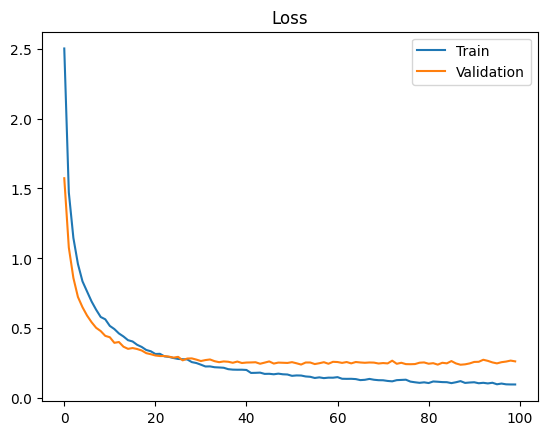

In [23]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

Optimal number of epochs would be about 50 for generalisation. 

Acuracy curves:

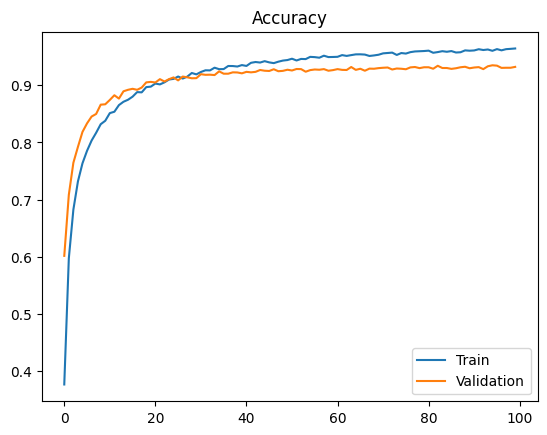

In [24]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [25]:
test_loss, test_acc = model.evaluate(X_val, y_val, batch_size = 128)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9291 - loss: 0.3024
The test loss is:  0.26311245560646057
The best accuracy is:  93.18476915359497


# Predicting on the test data

In [52]:
# header => for test data, we remove the columns "filename" and "label"
header_test = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean \
        mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var".split()

In [53]:
file = open('test_data/all_csv/data_test.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header_test)

In [ ]:
for filename in os.listdir(f"test_data/"):
    sound_name = f"test_data/{filename}"
    y, sr = librosa.load(sound_name, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

    for e in mfcc:
        to_append += f' {np.mean(e)}'

    file = open('test_data/all_csv/data_test.csv', 'a', newline = '')

    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [55]:
df_test = pd.read_csv('test_data/all_csv/data_test.csv')
df_test.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var
0,Cornell-NY-LongIsland-20090123-000000-LPfilter...,0.387097,0.225497,122.822588,193.583388,289.606582,0.002360,-330.366577,134.884445,93.309349,...,3.155356,-3.671819,-6.018852,-3.454629,0.940752,3.465086,2.600567,-0.163426,-1.985416,-1.048565
1,Tutr-multisound-NOAA-PAGroup-03-bottlenose-dol...,0.580779,0.012360,4305.353377,3026.143586,8044.438355,0.332597,-239.826141,31.434437,-7.070275,...,2.083760,5.464931,-3.501123,-0.868094,-7.742121,-0.091587,-5.063464,-2.545741,-4.337422,-2.575748
2,Stfr-Multisound-NOAA-PAGroup-01-atlantic-spott...,0.517157,0.060906,3882.642553,3364.273137,7636.442871,0.278269,-183.309372,75.157616,38.185295,...,-0.304409,6.529043,0.861367,7.027621,2.666737,4.561831,-1.460519,2.970615,-1.696198,-0.487870
3,Phma-clicks-NOAA-PAGroup-01-sperm-clip.mp3,0.735886,0.009793,4415.555121,2847.591934,7875.945224,0.334308,-253.931244,14.146472,-20.274191,...,0.119933,3.794635,-1.775898,0.321630,-4.040365,-0.753094,-5.397344,-2.292381,-5.609802,-1.893516
4,Meno-song-NOAA-PAGroup-13-humpback-clip.mp3,0.460321,0.050529,261.062685,250.870800,523.121837,0.014001,-430.309601,150.827408,94.687485,...,-2.316839,-8.536296,-5.795730,2.194222,8.474265,8.912679,4.807855,0.639276,-0.280720,1.697860


In [56]:
df_test.shape

(8, 27)

In [58]:
X_test = scaler.fit_transform(np.array(df_test.iloc[:, 1:27]))
print("X_test:", X_test)

X_test: [[-1.10634921  2.55814931 -1.36288058 -1.40175993 -1.38863142 -1.31898599
  -0.4254519   0.95508274  1.5871312   1.90421992  0.13572142 -1.07746868
  -0.84434599 -0.69383237  0.70478761  1.12224888  1.7046332  -1.20496501
  -1.32479355 -1.43070839  0.18546954 -0.07658052  1.0752874  -0.095541
  -0.02881675 -0.64679385]
 [ 0.6279938  -0.60502348  0.81744642  0.77142548  0.82858918  0.92869533
   0.47067036 -0.75650783 -0.66636384 -0.31027838 -0.46395348  0.359415
   0.82212327 -0.72788013 -0.6120903  -1.84767727  1.20081284  0.44512999
  -0.56995761 -0.62596199 -1.67434823 -1.27649574 -1.18134306 -0.91622171
  -0.68787569 -1.20066662]
 [ 0.05828571  0.11544835  0.59708992  1.03084387  0.71193726  0.55892849
   1.03004402 -0.03310353  0.3496113  -0.06947972  1.16992881  0.61350253
   1.98087406  2.0680777  -0.67417666  0.81187211  0.07799444  0.6373084
   0.73795298  1.83062578  0.55516481  0.29342872 -0.12047643  0.98410066
   0.05222529 -0.44344303]
 [ 2.0169158  -0.64311929  0

In [59]:
# generate predictions for samples
predictions = model.predict(X_test)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[2.43681949e-03 3.01021078e-06 4.21783261e-05 1.80136340e-05
  2.66533661e-05 1.52264674e-05 4.53378425e-06 4.00795358e-07
  9.62671748e-11 2.13736513e-07 8.68238459e-08 1.49169951e-04
  6.09332346e-04 9.56231263e-04 4.91323090e-06 1.68514307e-05
  1.44125138e-07 8.14637175e-08 3.36520076e-01 5.36936074e-02
  6.56892880e-05 2.86920258e-05 3.52968755e-07 1.20132864e-08
  4.10754513e-03 1.26462612e-14 3.89725045e-07 2.31139211e-06
  1.34911888e-05 2.17413159e-07 2.95909649e-06 5.98213971e-01
  2.71747672e-06 9.37531652e-08 1.25131907e-03 8.43249154e-07
  6.68726159e-07 9.07049582e-08 6.05593095e-06 7.22208404e-10
  4.55927613e-13 3.11598392e-09 2.37435190e-04 5.52879698e-09
  6.33079326e-05 3.01926413e-08 9.62228430e-09 1.36082605e-07
  4.22076383e-08 5.04643867e-05 1.22646359e-03 2.56723142e-05
  1.88249451e-05 1.82552583e-04 1.88784439e-11]
 [9.31700470e-07 6.23708620e-05 1.27590440e-07 1.39523271e-09
  5.05235539e-06 4.25709317e-07 6.28245004e-07

In [60]:
# generate argmax for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)

[31 41  9 16 18 27 41 24]


In [61]:
# transform classes number into classes name
result = encoder.inverse_transform(classes)
print(result)

['MinkeWhale' 'Short_Finned(Pacific)PilotWhale' 'CommonDolphin'
 "Grampus_Risso'sDolphin" 'GrayWhale' 'KillerWhale'
 'Short_Finned(Pacific)PilotWhale' 'HumpbackWhale']


In [62]:
df_test['filename']

0    Cornell-NY-LongIsland-20090123-000000-LPfilter...
1    Tutr-multisound-NOAA-PAGroup-03-bottlenose-dol...
2    Stfr-Multisound-NOAA-PAGroup-01-atlantic-spott...
3           Phma-clicks-NOAA-PAGroup-01-sperm-clip.mp3
4          Meno-song-NOAA-PAGroup-13-humpback-clip.mp3
5    Dele-multisound-NOAA-Castellote-01-beluga-clip...
6    Oror-Multisound-AWI-Van-Opzeeland-01-killer-cl...
7    Eugl-multisound-NOAA-PAGroup-01-right-whale-cl...
Name: filename, dtype: object

It did not predict any correct. 

# Save the Model

In [67]:
model.save('saved_models/cnn_simple_model.keras')

In [71]:
# my_model directory
%ls saved_models/

cnn_simple_model/  cnn_simple_model.keras


In [72]:
%ls saved_models/cnn_simple_model

In [76]:
model = tf.keras.models.load_model('saved_models/cnn_simple_model.keras')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 55)             │         3,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 569,639 (2.17 MB)

 Trainable params: 189,879 (741.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 379,760 (1.45 MB)

We got good training accuracy but gneralisation is horrible because the model cannot predict unseen data. It did not get a single sample correct. This is potentially due to the simplicity of the model and inability to handle diversity of recording devices and profiles. 